#### HR Data Analysis

In [1]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

## Data Loading and Preprocessing

In [2]:
# Import Dataset
data = pd.read_csv('HR Data.csv')
data.columns


Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [3]:
# Displaying the first few rows and the summary of the dataframe
display(data.head())

data.info()

# Step 1: Removeing unnecessary columns
columns_to_remove = ['EmployeeCount', 'Over18', 'StandardHours']
data_cleaned = data.drop(columns=columns_to_remove)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [4]:

# Step 2: Renameing the columns
columns_rename = {
    'Attrition': 'Left_Company',
    'BusinessTravel': 'Travel_Frequency',
    'DailyRate': 'Daily_Salary',
    'DistanceFromHome': 'Commute_Distance',
    'EducationField': 'Field_Of_Education',
    'EmployeeNumber': 'Employee_ID',
    'JobRole': 'Position',
    'MaritalStatus': 'Marital_State',
    'MonthlyIncome': 'Monthly_Salary',
    'MonthlyRate': 'Monthly_PayRate',
    'NumCompaniesWorked': 'Companies_Worked',
    'PercentSalaryHike': 'Salary_Hike_Percentage',
    'PerformanceRating': 'Performance_Score',
    'RelationshipSatisfaction': 'Relationship_Score',
    'StockOptionLevel': 'Stock_Options',
    'TotalWorkingYears': 'Years_Worked',
    'TrainingTimesLastYear': 'Training_LastYear',
    'WorkLifeBalance': 'Work_LifeScore',
    'YearsAtCompany': 'Years_In_Company',
    'YearsInCurrentRole': 'Current_RoleYears',
    'YearsSinceLastPromotion': 'Years_Since_Promotion',
    'YearsWithCurrManager': 'Years_With_Manager'
}
data_cleaned.rename(columns=columns_rename, inplace=True)

In [5]:

# Step 3: Eliminateing redundant entries (duplicates)
data_cleaned.drop_duplicates(inplace=True)

In [6]:
import warnings
warnings.filterwarnings('ignore')


In [7]:

# Step 4: Sanitize specific columns (trim whitespace in string columns)
string_columns = data_cleaned.select_dtypes(include=['object']).columns
data_cleaned[string_columns] = data_cleaned[string_columns].apply(lambda x: x.str.strip())

In [8]:
# Step 5: Eliminate NaN values
data_cleaned.dropna(inplace=True)

# Display the cleaned data information
data_cleaned.info()
display(data_cleaned.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      1470 non-null   int64 
 1   Left_Company             1470 non-null   object
 2   Travel_Frequency         1470 non-null   object
 3   Daily_Salary             1470 non-null   int64 
 4   Department               1470 non-null   object
 5   Commute_Distance         1470 non-null   int64 
 6   Education                1470 non-null   int64 
 7   Field_Of_Education       1470 non-null   object
 8   Employee_ID              1470 non-null   int64 
 9   EnvironmentSatisfaction  1470 non-null   int64 
 10  Gender                   1470 non-null   object
 11  HourlyRate               1470 non-null   int64 
 12  JobInvolvement           1470 non-null   int64 
 13  JobLevel                 1470 non-null   int64 
 14  Position                 1470 non-null  

,Age,Left_Company,Travel_Frequency,Daily_Salary,Department,Commute_Distance,Education,Field_Of_Education,Employee_ID,EnvironmentSatisfaction,...,Performance_Score,Relationship_Score,Stock_Options,Years_Worked,Training_LastYear,Work_LifeScore,Years_In_Company,Current_RoleYears,Years_Since_Promotion,Years_With_Manager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,...,3,4,1,6,3,3,2,2,2,2


## Exploratory Data Analysis (EDA)

<class 'pandas.core.frame.DataFrame'>
Index: 1220 entries, 0 to 1469
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      1220 non-null   float64
 1   Left_Company             1220 non-null   float64
 2   Travel_Frequency         1220 non-null   float64
 3   Daily_Salary             1220 non-null   float64
 4   Department               1220 non-null   float64
 5   Commute_Distance         1220 non-null   float64
 6   Education                1220 non-null   float64
 7   Field_Of_Education       1220 non-null   float64
 8   Employee_ID              1220 non-null   float64
 9   EnvironmentSatisfaction  1220 non-null   float64
 10  Gender                   1220 non-null   float64
 11  HourlyRate               1220 non-null   float64
 12  JobInvolvement           1220 non-null   float64
 13  JobLevel                 1220 non-null   float64
 14  Position                 1220

,Age,Left_Company,Travel_Frequency,Daily_Salary,Department,Commute_Distance,Education,Field_Of_Education,Employee_ID,EnvironmentSatisfaction,...,Performance_Score,Relationship_Score,Stock_Options,Years_Worked,Training_LastYear,Work_LifeScore,Years_In_Company,Current_RoleYears,Years_Since_Promotion,Years_With_Manager
0,0.605539,2.201712,0.596575,0.740463,1.396342,-1.026346,-0.868756,-0.938493,-1.702082,-0.662385,...,-0.423112,-1.564940,-0.926364,-0.251486,-2.170679,-2.479904,0.088625,0.101303,-0.716330,0.441251
1,1.527189,-0.454192,-0.899452,-1.310371,-0.502333,-0.156800,-1.846201,-0.938493,-1.700428,0.256498,...,2.363442,1.211498,0.235154,0.090829,0.139358,0.336990,1.082754,1.077410,-0.263984,1.080574
2,0.144715,2.201712,0.596575,1.415768,-0.502333,-0.902125,-0.868756,1.301521,-1.697120,1.175380,...,-0.423112,-0.639461,-0.926364,-0.422644,0.139358,0.336990,-1.402567,-1.200172,-0.716330,-1.157058
3,-0.316110,-0.454192,-0.899452,1.463114,-0.502333,-0.777904,1.086133,-0.938493,-1.695466,1.175380,...,-0.423112,0.286019,-0.926364,-0.251486,0.139358,0.336990,0.585690,1.077410,0.640708,-1.157058
4,-1.007348,-0.454192,0.596575,-0.532898,-0.502333,-0.902125,-1.846201,0.554850,-1.692157,-1.581267,...,-0.423112,1.211498,0.235154,-0.593802,0.139358,0.336990,-0.905503,-0.549434,0.188362,-0.517734


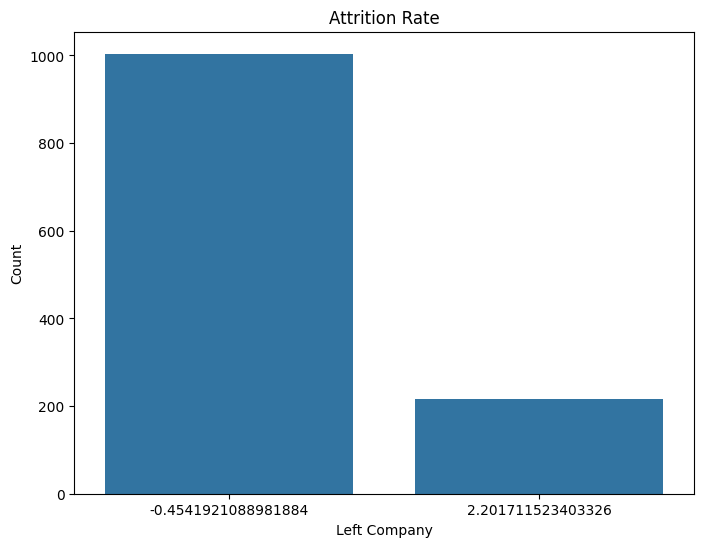

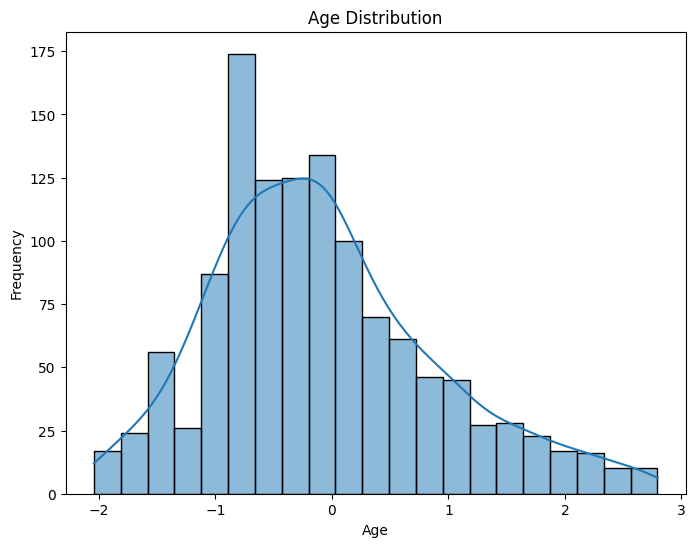

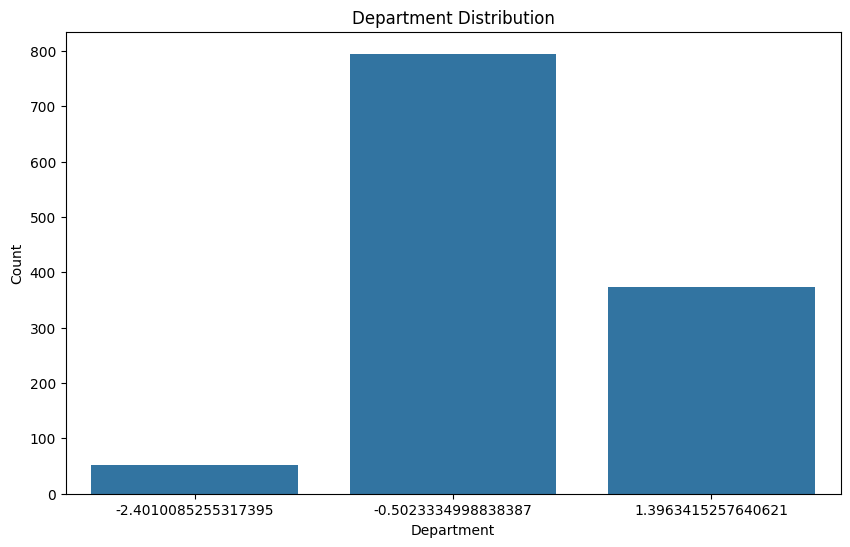

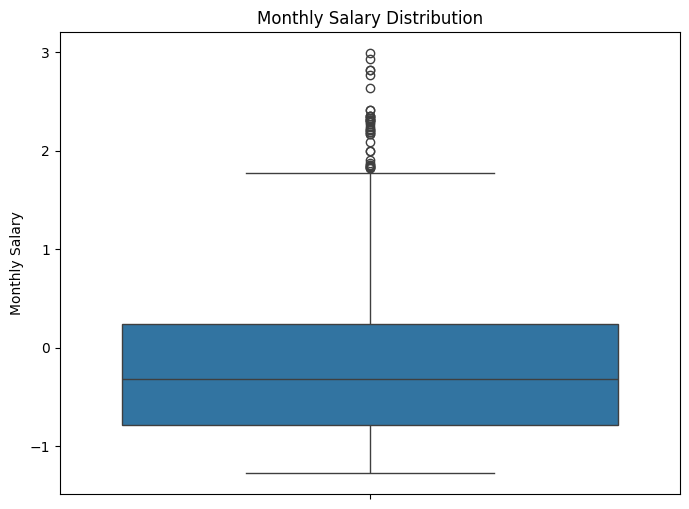

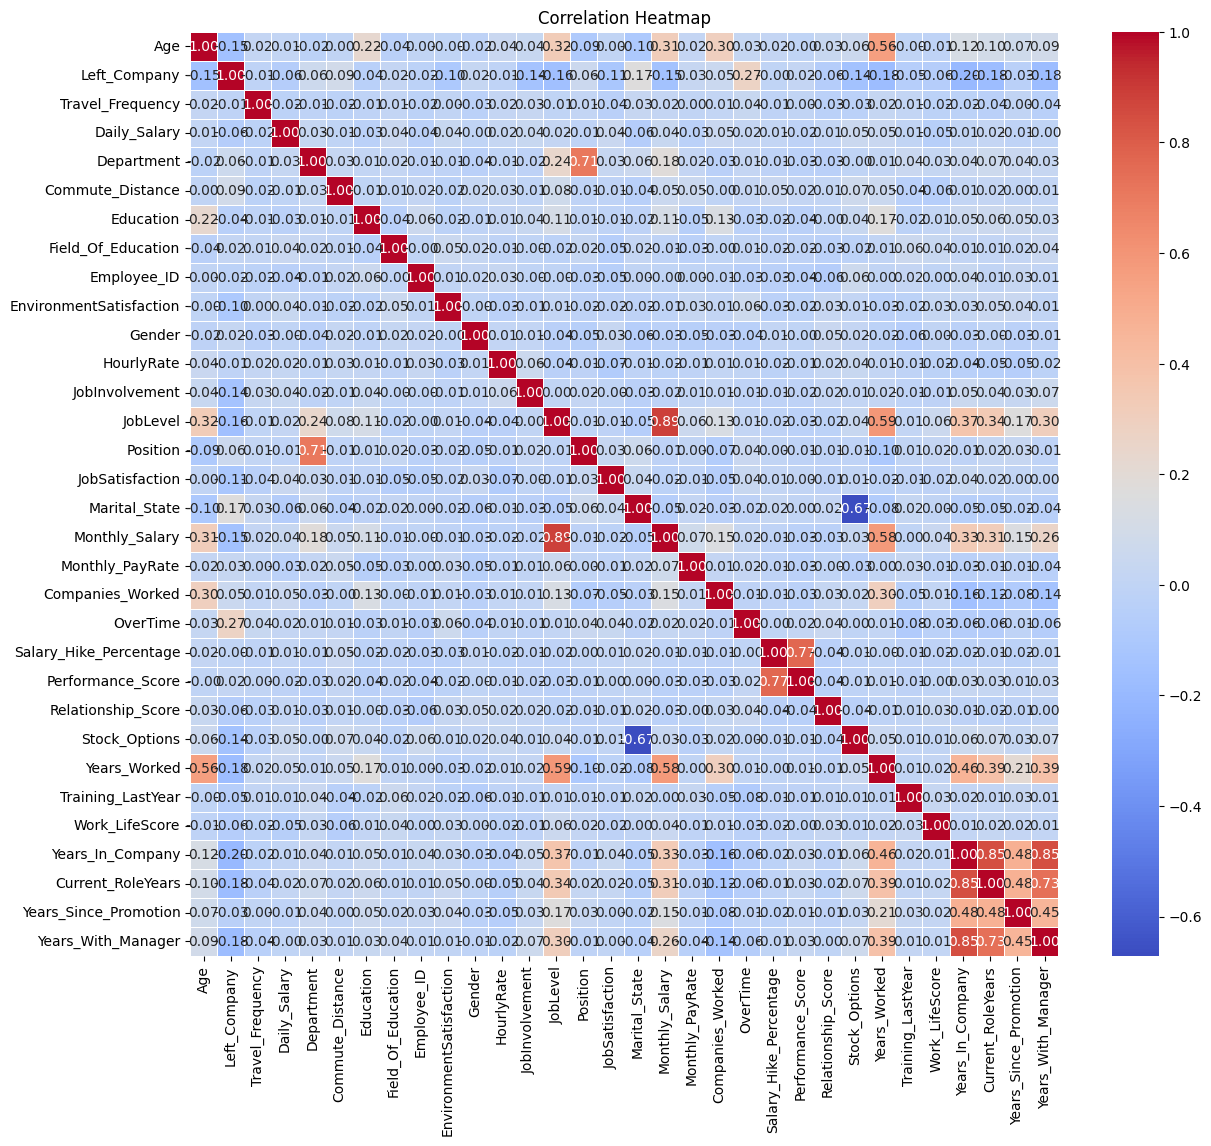

Cleaned data saved as HR Data Cleaned.csv


In [11]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
# Additional Step 1: Encode categorical variables
label_encoders = {}
for column in string_columns:
    le = LabelEncoder()
    data_cleaned[column] = le.fit_transform(data_cleaned[column])
    label_encoders[column] = le

# Additional Step 2: Standardize numerical features
numerical_columns = data_cleaned.select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()
data_cleaned[numerical_columns] = scaler.fit_transform(data_cleaned[numerical_columns])

# Additional Step 3: Outlier Detection and Handling (simple example using z-score)
from scipy import stats

z_scores = stats.zscore(data_cleaned[numerical_columns])
abs_z_scores = abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
data_cleaned = data_cleaned[filtered_entries]

# Display the cleaned data information
data_cleaned.info()
display(data_cleaned.head())

# Visualizations

# Attrition Rate
plt.figure(figsize=(8, 6))
sns.countplot(x='Left_Company', data=data_cleaned)
plt.title('Attrition Rate')
plt.xlabel('Left Company')
plt.ylabel('Count')
plt.show()

# Age Distribution
plt.figure(figsize=(8, 6))
sns.histplot(data_cleaned['Age'], kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Department Distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='Department', data=data_cleaned)
plt.title('Department Distribution')
plt.xlabel('Department')
plt.ylabel('Count')
plt.show()

# Monthly Salary Distribution
plt.figure(figsize=(8, 6))
sns.boxplot(y='Monthly_Salary', data=data_cleaned)
plt.title('Monthly Salary Distribution')
plt.ylabel('Monthly Salary')
plt.show()

# Correlation Heatmap
plt.figure(figsize=(14, 12))
correlation_matrix = data_cleaned.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()



# Save the cleaned dataset to a new CSV file
cleaned_file_path = 'HR Data Cleaned.csv'  
data_cleaned.to_csv(cleaned_file_path, index=False)
print(f"Cleaned data saved as {cleaned_file_path}")